In [2]:
## Analysis Goal 
# figuring out online shopping mall customer order data
# building a model or setting a goal 

In [3]:
# Data Set
# Dec 2010 to Dec 2011 data from Online retail website
# Data reference: UCI ML Repository 
# https://archive.ics.uci.edu/ml/datasets/Online+Retail

In [4]:
import numpy as np
import pandas as pd

In [5]:
retail = pd.read_csv('./OnlineRetail.csv')

In [8]:
# Checking columns
 ## Column
    #invoiceNo
    #StockCode
    #Description
    #Quantity
    #InvoiceDate
    #UnitPrice
    #Customer ID
    #Country

In [9]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
#Data cleansing 
#null data-processing  : Customer ID
#Data processing that doesn't fit into Business logic
#ex) minus item stock, price is zero

In [16]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [17]:
#get rid of null customer Id 
retail=retail[pd.notnull(retail['CustomerID'])]
len(retail)

406829

In [18]:
#removing data that doesnt fit into business logic 
retail = retail[retail['Quantity']>0]
retail = retail[retail['UnitPrice']>0]

len(retail)

397884

In [19]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [20]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [21]:
#changing data type
#for memory efficiency 
#right matching for data type

In [22]:
retail['CustomerID'] = retail['CustomerID'].astype(np.int32)
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  int32  
 7   Country      397884 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 25.8+ MB


In [23]:
#adding a new column 
# Quantity * UnitPrice is customer's total spendings (checkoutprice)

retail['CheckoutPrice']=retail['UnitPrice'] * retail['Quantity']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [24]:
# Goal of data analysis through this mini project
# 1. sales analysis
# 2. customer analysis - Sorting VIPs, customer retention 
# 3. desicion making for push notification 

In [25]:
#### Checking figure for each items
#### Checking selling figure by time, region 

In [28]:
#seaborn
import seaborn as sns
COLORS = sns.color_palette()

%matplotlib inline

In [29]:
#data loading 
dtypes = {
    'UnitPrice': np.float32,
    'CustomerID': np.int32,
    'Quantity': np.int32
}

In [30]:
#date type data sorting 
# date/datetime type loading is better than string type for analysis 
retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'], infer_datetime_format = True)
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      397884 non-null  object        
 1   StockCode      397884 non-null  object        
 2   Description    397884 non-null  object        
 3   Quantity       397884 non-null  int64         
 4   InvoiceDate    397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  int32         
 7   Country        397884 non-null  object        
 8   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.8+ MB


In [31]:
# Whole revenue
total_revenue = retail['CheckoutPrice'].sum()
total_revenue

8911407.904

In [32]:
#revenue by countries
rev_by_countries = retail.groupby('Country').sum()['CheckoutPrice'].sort_values()
rev_by_countries

Country
Saudi Arabia            1.459200e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Unspecified             2.667070e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.760520e+03
Israel                  7.221690e+03
Poland                  7.334650e+03
Austria                 1.019868e+04
Cyprus                  1.359038e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.045044e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.343989e+04
Norway                  3.616544e+04
Japan                   3.7416

[Text(0, 0, 'Saudi Arabia'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'RSA'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'European Community'),
 Text(0, 0, 'Lithuania'),
 Text(0, 0, 'Lebanon'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0, 0, 'Unspecified'),
 Text(0, 0, 'Malta'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Iceland'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Israel'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Channel Islands'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'EIRE'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'United Kingdom')]

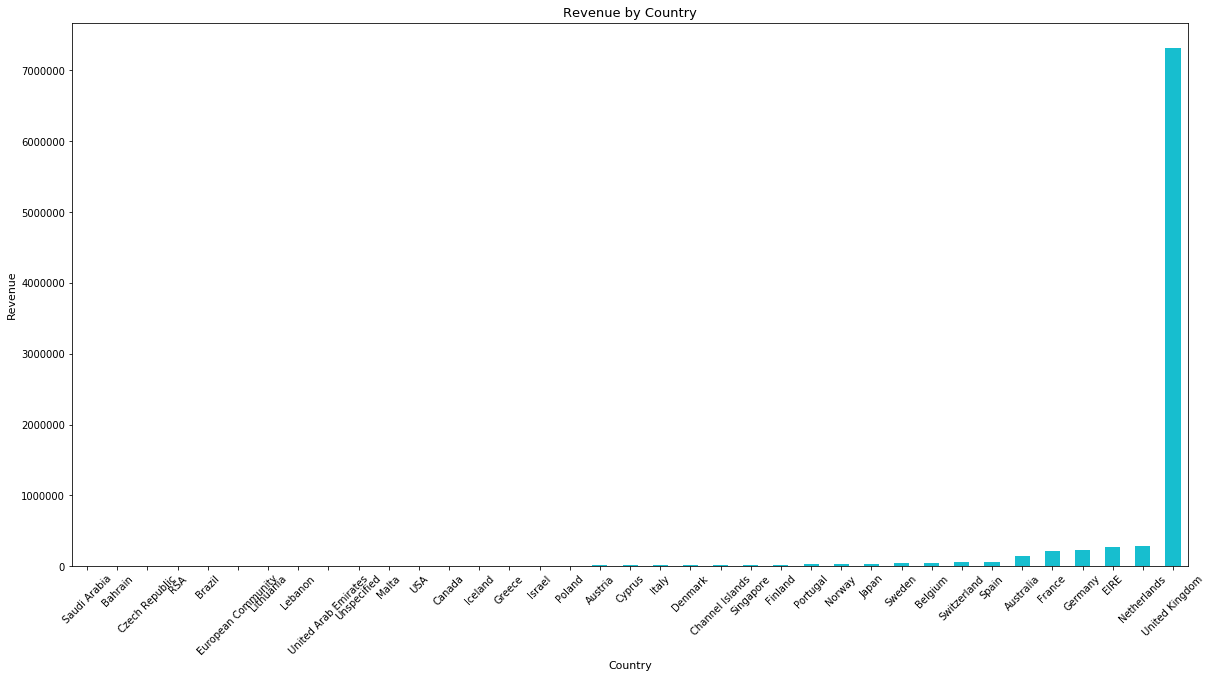

In [33]:
plot=rev_by_countries.plot(kind='bar', color=COLORS[-1], figsize=(20,10))
plot.set_xlabel('Country', fontsize=11)
plot.set_ylabel('Revenue', fontsize=11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels=rev_by_countries.index, rotation=45)

In [34]:
rev_by_countries / total_revenue

Country
Saudi Arabia            0.000016
Bahrain                 0.000062
Czech Republic          0.000093
RSA                     0.000112
Brazil                  0.000128
European Community      0.000146
Lithuania               0.000186
Lebanon                 0.000190
United Arab Emirates    0.000213
Unspecified             0.000299
Malta                   0.000306
USA                     0.000402
Canada                  0.000411
Iceland                 0.000484
Greece                  0.000534
Israel                  0.000810
Poland                  0.000823
Austria                 0.001144
Cyprus                  0.001525
Italy                   0.001962
Denmark                 0.002127
Channel Islands         0.002295
Singapore               0.002388
Finland                 0.002530
Portugal                0.003752
Norway                  0.004058
Japan                   0.004199
Sweden                  0.004307
Belgium                 0.004623
Switzerland             0.006334
Sp

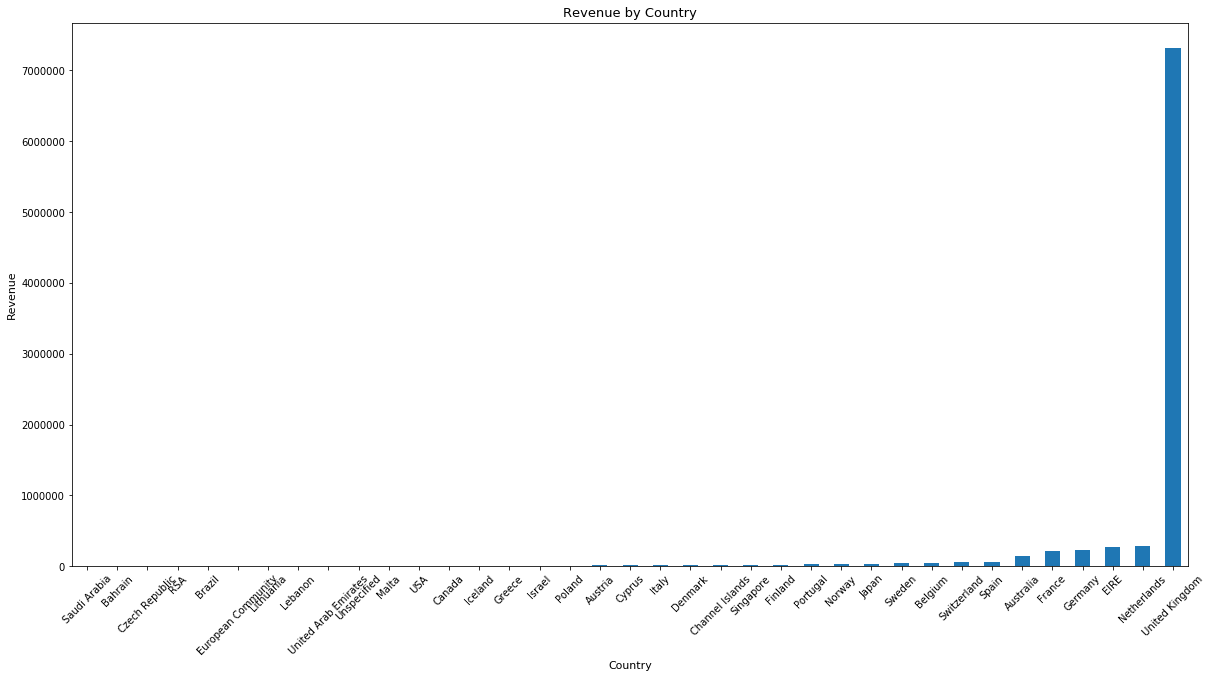

In [37]:
#graph 
def plot_bar(df, xlabel, ylabel, title, color=COLORS[0], figsize=(20,10), rotation=45):
    plot = df.plot(kind='bar',color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=11)
    plot.set_ylabel(ylabel, fontsize=11)
    plot.set_title(title, fontsize=13)
    plot.set_xticklabels(labels=df.index, rotation=rotation)
    
plot_bar(rev_by_countries, 'Country','Revenue', 'Revenue by Country')

In [39]:
# revenue by month 
retail['InvoiceDate'].sort_values(ascending=False)

541908   2011-12-09 12:50:00
541900   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541895   2011-12-09 12:50:00
541896   2011-12-09 12:50:00
                 ...        
4        2010-12-01 08:26:00
3        2010-12-01 08:26:00
2        2010-12-01 08:26:00
1        2010-12-01 08:26:00
0        2010-12-01 08:26:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

In [42]:
def extract_month(date):
    month=str(date.month)
    if date.month < 10:
        month = '0' + month
        return str(date.year) + month

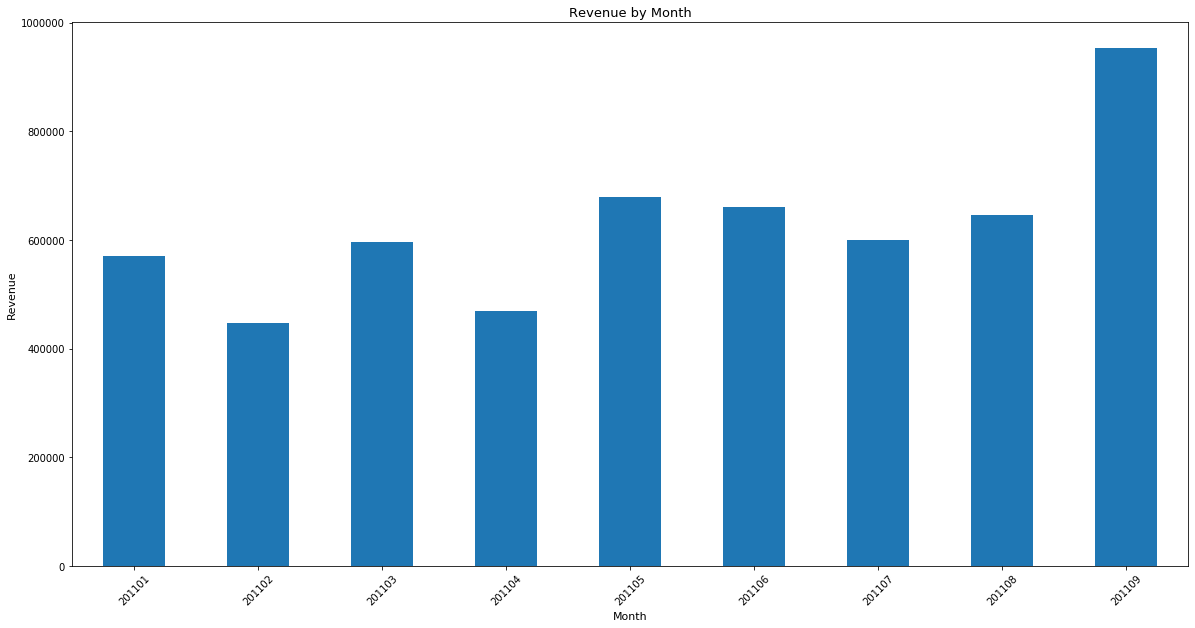

In [43]:
rev_by_month = retail.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
rev_by_month

plot_bar(rev_by_month, 'Month', 'Revenue','Revenue by Month')

In [45]:
# revenue by day
rev_by_dow = retail.set_index('InvoiceDate').groupby(lambda date: date.dayofweek).sum()['CheckoutPrice']
rev_by_dow

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

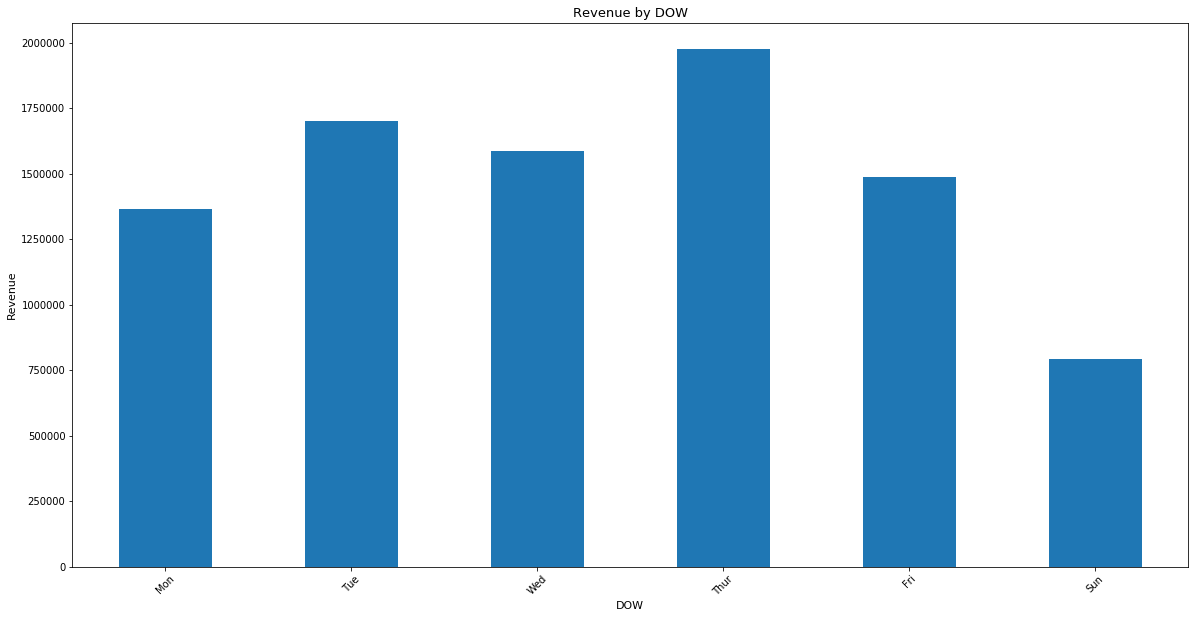

In [46]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed','Thur','Fri','Sat','Sun'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]
plot_bar(rev_by_dow, 'DOW', 'Revenue', 'Revenue by DOW')

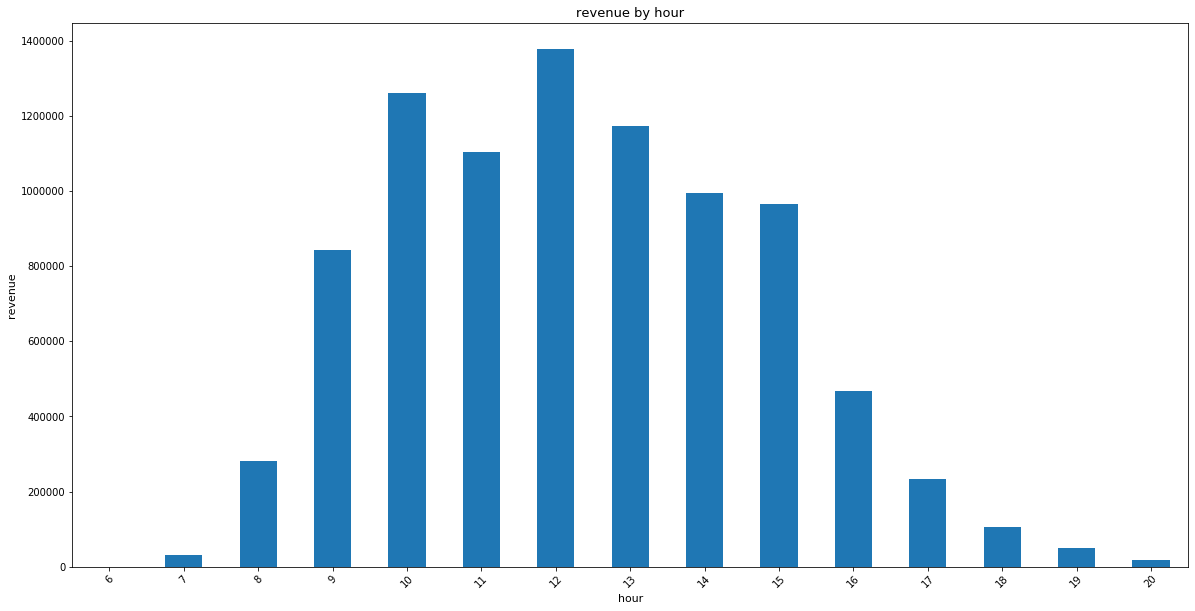

In [48]:
# revenue by time
rev_by_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
plot_bar(rev_by_hour, 'hour', 'revenue', 'revenue by hour')

In [50]:
####### Insight from revenue data 
# 82% of revenue has been made from the United Kingdom 
# Nov, 2011 has the highest volume of order (December data is not fully applied)
# november and december sales are overwhelming (black friday, cyber monday, christmas)
# it has a steady growing trend til Thursday, but it decreases after thursday, no order on Saturday
# Order has been made from 7am and it increases til 12pm, after that, it decreases til 15 pm, and it drastically decreases after 15pm

In [51]:
# Metrics by items
# Top 10 selling items
# Top 10 sales items

top_selling = retail.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:3]
top_selling

StockCode
23843    80995
23166    77916
84077    54415
Name: Quantity, dtype: int64

In [53]:
top_revenue=retail.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
top_revenue

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

In [54]:
# trend of top 3 items' sales 
monthly_top3= retail.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity', 'CheckoutPrice']].loc[top_selling.index]

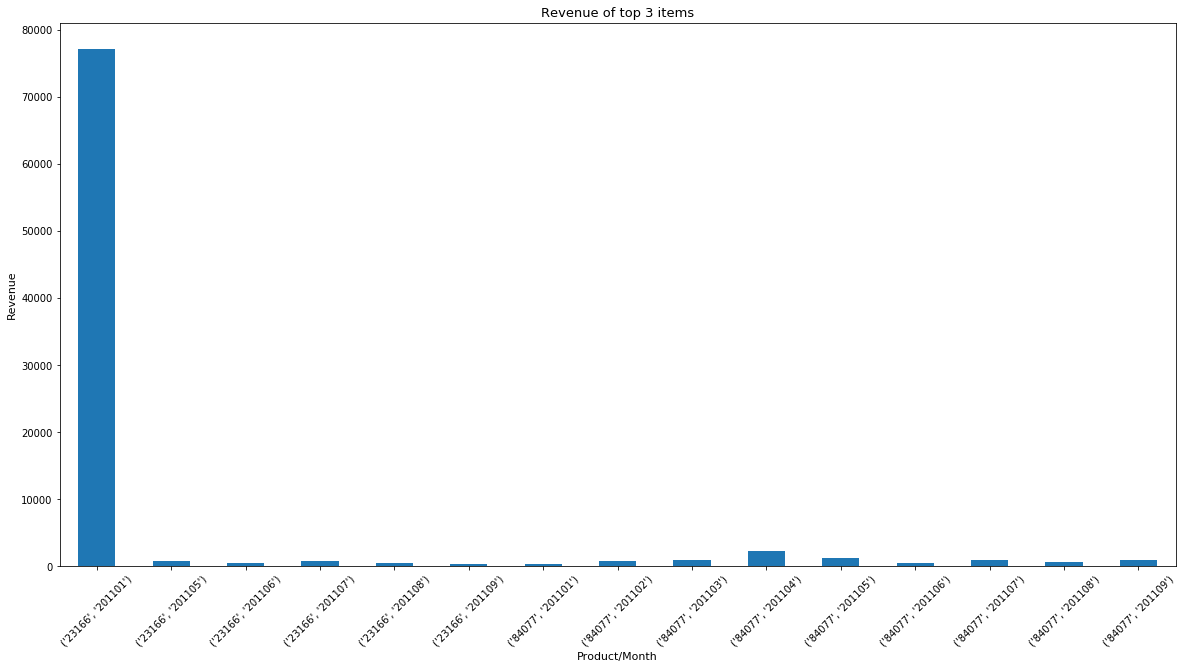

In [55]:
plot_bar(monthly_top3['CheckoutPrice'], 'Product/Month', 'Revenue', 'Revenue of top 3 items')

In [56]:
# Sorting VIP
# customer retention

from datetime import datetime
from matplotlib import pyplot as plt

In [58]:
retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [59]:
#checking VIP
# how many times they have bought 
# how much they have spent

In [60]:
retail.groupby('CustomerID').count()['Quantity'].sort_values(ascending=False)

CustomerID
17841    7847
14911    5675
14096    5111
12748    4595
14606    2700
         ... 
15823       1
15802       1
15753       1
15668       1
12346       1
Name: Quantity, Length: 4338, dtype: int64

In [61]:
retail.groupby('CustomerID').sum()['CheckoutPrice'].sort_values(ascending=False)

CustomerID
14646    280206.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    143825.06
           ...    
16878        13.30
17956        12.75
16454         6.90
14792         6.20
16738         3.75
Name: CheckoutPrice, Length: 4338, dtype: float64

In [63]:
###Checking customer retention
# calculating the first month they purchased by customer 
def get_month_as_datetime(date):
    return datetime(date.year, date.month, 1)

retail['Month']=retail['InvoiceDate'].apply(get_month_as_datetime)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [64]:
month_group = retail.groupby('CustomerID')['Month']
retail['MonthStarted']=month_group.transform(np.min)
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01


In [65]:
###Calculating the month and actual purchasing month 
retail['MonthPassed']=(retail['Month'].dt.year - retail['MonthStarted'].dt.year) *12 + \
    (retail['Month'].dt.month - retail['MonthStarted'].dt.month)

In [66]:
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted,MonthPassed
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011-12-01,2011-08-01,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011-12-01,2011-08-01,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011-12-01,2011-08-01,4
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011-12-01,2011-08-01,4


In [68]:
# Count the customers by month passed
def get_unique_no(x):
    return len(np.unique(x))

cohort_group = retail.groupby(['MonthStarted', 'MonthPassed'])
cohort_df = cohort_group['CustomerID'].apply(get_unique_no).reset_index()
cohort_df.head()

,MonthStarted,MonthPassed,CustomerID
0,2010-12-01,0,885
1,2010-12-01,1,324
2,2010-12-01,2,286
3,2010-12-01,3,340
4,2010-12-01,4,321


In [69]:
####Table Pivot 

cohort_df = cohort_df.pivot(index ='MonthStarted', columns='MonthPassed')
cohort_df.head()

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        885.0  324.0  286.0  340.0  321.0  352.0  321.0  309.0   
2011-01-01        417.0   92.0  111.0   96.0  134.0  120.0  103.0  101.0   
2011-02-01        380.0   71.0   71.0  108.0  103.0   94.0   96.0  106.0   
2011-03-01        452.0   68.0  114.0   90.0  101.0   76.0  121.0  104.0   
2011-04-01        300.0   64.0   61.0   63.0   59.0   68.0   65.0   78.0   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    313.0  350.0  331.0  445.0  235.0  
2011-01-01    125.0  136.0  152.0   49.0    NaN  
2011-02-01     94.0  116.0   26.0    NaN    NaN  
2011-03-01    126.0   39.0    NaN    NaN    NaN  
2011-04-01     22.0    NaN    NaN    NaN    NaN

In [70]:
customer_cohort = cohort_df.div(cohort_df.iloc[:, 0], axis=0) * 100
customer_cohort = customer_cohort.round(decimals=2)

customer_cohort

CustomerID                                                   \
MonthPassed          0      1      2      3      4      5      6      7    
MonthStarted                                                               
2010-12-01        100.0  36.61  32.32  38.42  36.27  39.77  36.27  34.92   
2011-01-01        100.0  22.06  26.62  23.02  32.13  28.78  24.70  24.22   
2011-02-01        100.0  18.68  18.68  28.42  27.11  24.74  25.26  27.89   
2011-03-01        100.0  15.04  25.22  19.91  22.35  16.81  26.77  23.01   
2011-04-01        100.0  21.33  20.33  21.00  19.67  22.67  21.67  26.00   
2011-05-01        100.0  19.01  17.25  17.25  20.77  23.24  26.41   9.51   
2011-06-01        100.0  17.36  15.70  26.45  23.14  33.47   9.50    NaN   
2011-07-01        100.0  18.09  20.74  22.34  27.13  11.17    NaN    NaN   
2011-08-01        100.0  20.71  24.85  24.26  12.43    NaN    NaN    NaN   
2011-09-01        100.0  23.41  30.10  11.37    NaN    NaN    NaN    NaN   
2011-10-01        100.0  24.02  11.45    NaN    NaN    NaN    NaN    NaN   
2011-11-01        100.0  11.15    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01        100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                 
MonthPassed      8      9      10     11     12  
MonthStarted                                     
2010-12-01    35.37  39.55  37.40  50.28  26.55  
2011-01-01    29.98  32.61  36.45  11.75    NaN  
2011-02-01    24.74  30.53   6.84    NaN    NaN  
2011-03-01    27.88   8.63    NaN    NaN    NaN  
2011-04-01     7.33    NaN    NaN    NaN    NaN  
2011-05-01      NaN    NaN    NaN    NaN    NaN  
2011-06-01      NaN    NaN    NaN    NaN    NaN  
2011-07-01      NaN    NaN    NaN    NaN    NaN  
2011-08-01      NaN    NaN    NaN    NaN    NaN  
2011-09-01      NaN    NaN    NaN    NaN    NaN  
2011-10-01      NaN    NaN    NaN    NaN    NaN  
2011-11-01      NaN    NaN    NaN    NaN    NaN  
2011-12-01      NaN    NaN    NaN    NaN    NaN

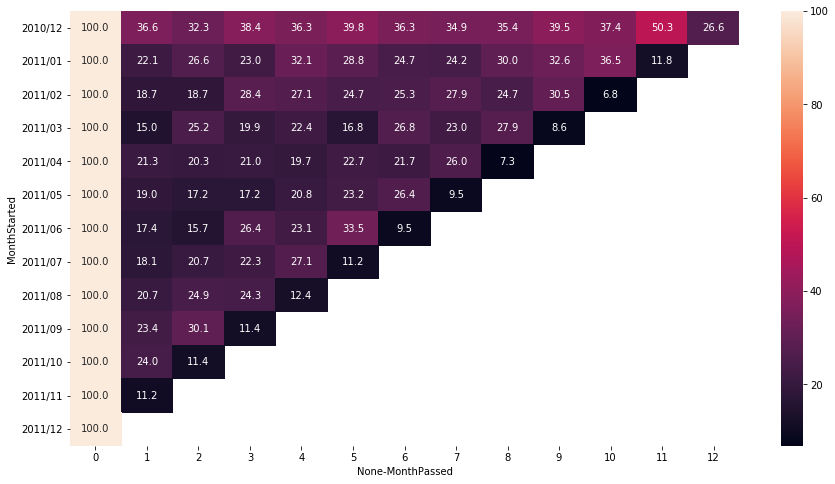

In [73]:
# printing heatmap 
# visualizeing the data through heatmap def from seaborn 

xticks = np.arange(0,13)
yticks = ['2010/12', '2011/01','2011/02', '2011/03', '2011/04', '2011/05', '2011/06', '2011/07', '2011/08', '2011/09', '2011/10', '2011/11', '2011/12']

plt.figure(figsize = (15,8))
sns.heatmap(customer_cohort, 
           annot=True, 
           xticklabels=xticks,
           yticklabels=yticks,
           fmt='.1f')

In [86]:
##### Decision making for Push notification time 

def plot_bar(df, xlabel, ylabel, title, figsize=(20,10), color=COLORS[-1], rotation=45):
    plot = df.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=10)
    plot.set_ylabel(ylabel, fontsize=10)
    plot.set_title(title, fontsize=12)
    plot.set_title(title, fontsize=12)
    plot.set_xticklabels(labels=df.index, rotation=rotation)

In [87]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], infer_datetime_format=True)
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CheckoutPrice,Month,MonthStarted,MonthPassed
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01,2010-12-01,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01,2010-12-01,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01,2010-12-01,0


In [88]:
### When giving away coupons, when is the good time?
# checking hour, minute data -> Invoice Date is the important feature

In [89]:
order_by_hour = retail.set_index('InvoiceDate').groupby(lambda date:date.hour).count()['CustomerID']
order_by_hour

6         1
7       379
8      8690
9     21944
10    37997
11    49084
12    72065
13    64026
14    54118
15    45369
16    24089
17    13071
18     2928
19     3321
20      802
Name: CustomerID, dtype: int64

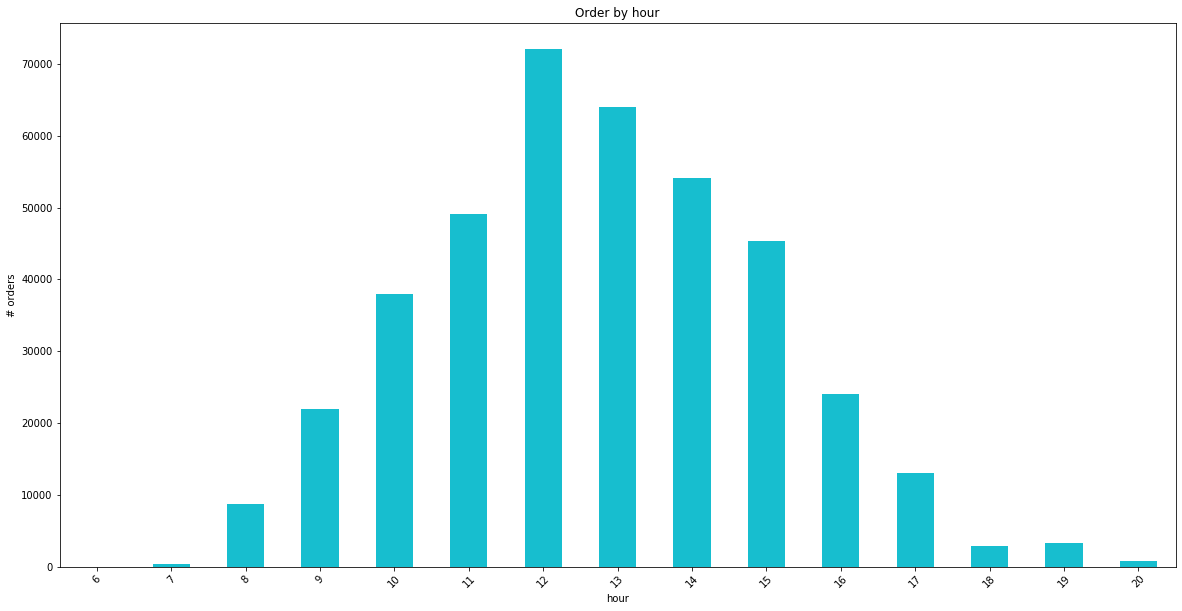

In [90]:
plot_bar(order_by_hour, 'hour', '# orders', 'Order by hour')

In [92]:
def half_an_hour(date):
    minute = ':00'
    if date.minute > 30:
        minute = ':30'
    hour = str(date.hour)
    if date.hour < 10:
        hour = '0' + hour
            
    return hour + minute

In [93]:
order_by_hour_half = retail.set_index('InvoiceDate').groupby(half_an_hour).count()['CustomerID']
order_by_hour_half


06:00        1
07:30      379
08:00     3145
08:30     5545
09:00     9364
09:30    12580
10:00    16950
10:30    21047
11:00    18925
11:30    30159
12:00    37174
12:30    34891
13:00    31131
13:30    32895
14:00    26958
14:30    27160
15:00    24227
15:30    21142
16:00    14316
16:30     9773
17:00     8889
17:30     4182
18:00     1715
18:30     1213
19:00     1534
19:30     1787
20:00      802
Name: CustomerID, dtype: int64

In [94]:
order_by_hour_half / order_by_hour_half.sum()

06:00    0.000003
07:30    0.000953
08:00    0.007904
08:30    0.013936
09:00    0.023534
09:30    0.031617
10:00    0.042600
10:30    0.052897
11:00    0.047564
11:30    0.075798
12:00    0.093429
12:30    0.087691
13:00    0.078241
13:30    0.082675
14:00    0.067753
14:30    0.068261
15:00    0.060890
15:30    0.053136
16:00    0.035980
16:30    0.024562
17:00    0.022341
17:30    0.010511
18:00    0.004310
18:30    0.003049
19:00    0.003855
19:30    0.004491
20:00    0.002016
Name: CustomerID, dtype: float64

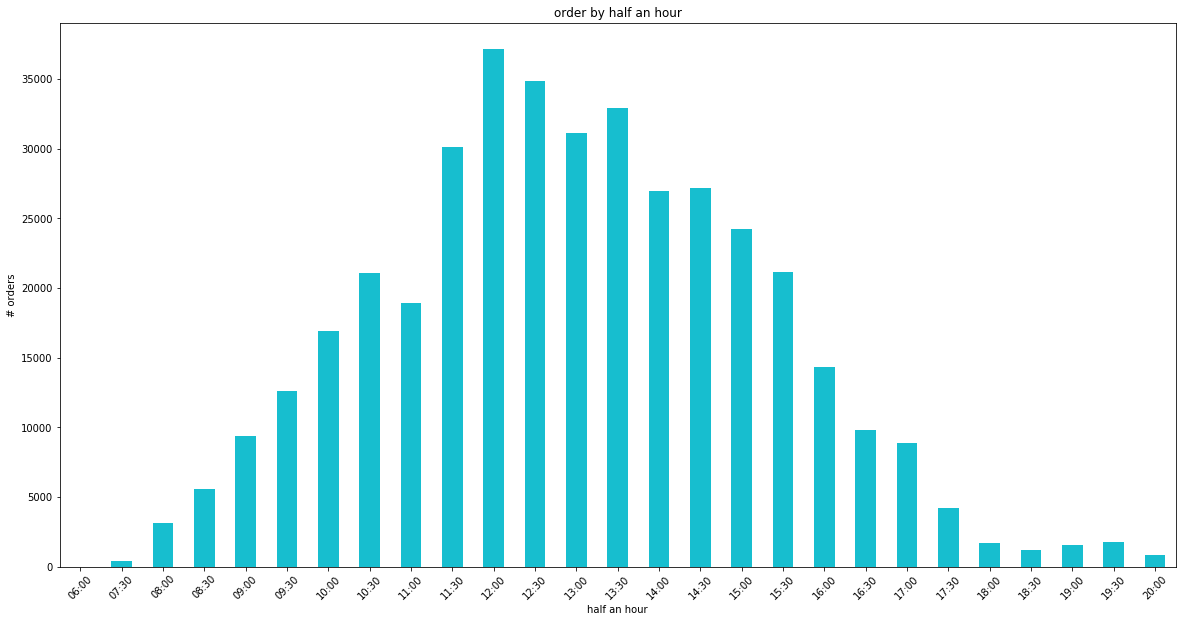

In [96]:
plot_bar(order_by_hour_half, 'half an hour', '# orders', 'order by half an hour')

In [97]:
###Customized push notification 
# volume of order by time
order_count_by_hour = retail.set_index('InvoiceDate').groupby(['CustomerID', lambda date: date.hour]).count()['StockCode']
order_count_by_hour

CustomerID    
12346       10     1
12347       8     22
            10    24
            12    47
            13    18
                  ..
18283       15     1
            16    56
            19    87
18287       9      3
            10    67
Name: StockCode, Length: 11205, dtype: int64

In [98]:
#### calculating time of the highest order volume
idx = order_count_by_hour.groupby('CustomerID').idxmax()

In [99]:
## time indexing
result = order_count_by_hour.loc[idx]
result

CustomerID    
12346       10      1
12347       14     60
12348       19     17
12349       9      73
12350       16     17
                 ... 
18280       9      10
18281       10      7
18282       13      7
18283       14    201
18287       10     67
Name: StockCode, Length: 4338, dtype: int64

In [100]:
result.reset_index().groupby('level_1').groups

{7: Int64Index([73, 269, 319, 344, 375, 893, 1667, 2317], dtype='int64'),
 8: Int64Index([  46,   58,   87,  126,  172,  179,  187,  260,  278,  279,
             ...
             4000, 4088, 4156, 4167, 4169, 4185, 4259, 4300, 4301, 4302],
            dtype='int64', length=125),
 9: Int64Index([   3,    9,   26,   30,   33,   35,   37,   48,   60,   66,
             ...
             4241, 4251, 4265, 4268, 4288, 4291, 4303, 4307, 4320, 4333],
            dtype='int64', length=333),
 10: Int64Index([   0,   11,   21,   27,   28,   41,   42,   45,   49,   51,
             ...
             4290, 4292, 4294, 4296, 4297, 4319, 4322, 4330, 4334, 4337],
            dtype='int64', length=510),
 11: Int64Index([  29,   32,   34,   57,   99,  102,  111,  124,  139,  148,
             ...
             4172, 4186, 4201, 4214, 4237, 4239, 4253, 4310, 4328, 4332],
            dtype='int64', length=477),
 12: Int64Index([  12,   20,   22,   36,   50,   62,   64,   67,   72,   74,
             ...
  